In [1]:
import torch
from jackpot import Jackpot

import matplotlib as mpl 
#mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.family"] = "DejaVu Sans"

params = {
    "experiment_name": "jmlr_inverse_problem",
    "save_plot": True,
    "n_singular_pairs": 200,
    "max_compute_time": 3600,
    "load_sing_pairs": True,
    "save_sing_pairs": True,
    "D": 2,
    "epsilon": 1e-1,
    "n_points_per_axis": 5,
    "grid_length": 1e-2,
    "load_manifold": True,
    "save_manifold": True,
}

/home/munier/python_envs/jackpot_env/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


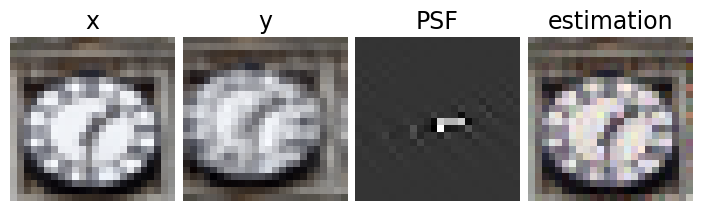

In [2]:
import torch.optim as optim
import torch

import matplotlib.pyplot as plt
from pathlib import Path

import deepinv as dinv
# from utils_codes.utils import neurips_mode, default_plot_styles, save_this_plot

######## IMPORT THE MODEL #################################
from article_examples.inv_pb.all_models import DirectModel

import imageio.v3 as iio

from tqdm import tqdm
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float32
factory_kwargs = {"device": device, "dtype": dtype}

img_size = 24
n_channels = 3
image_type = "bell_zoom"
model = "small_kernel_convol"

direct_model = DirectModel()
direct_model.choose_model(model, image_type,
                          img_size=img_size, n_channels=n_channels,
                          recompute_map=False)
jvp_fn, vjp_fn, x, x_est, _ = direct_model.get_all(False)
kernel = direct_model.kernel.detach()
direct_model.empty_cache()

Phi = direct_model.Phi
y = direct_model.y.clone()
sigma_noise = direct_model.noise_thres

dinv.utils.plot({"x": x, "y": y, "PSF": kernel, "estimation": x_est})

saves/jmlr_inverse_problem/jmlr_inverse_problem_n_200.singpairs loaded.



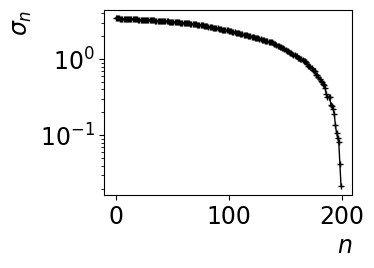

In [3]:
# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------


# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jacobian_spectrum()

# Plot spectrum
jack.jacobian_spectrum_plot()
# ------------------------------------

There is no Jackpot manifold saved file here: saves/jmlr_inverse_problem/jmlr_inverse_problem_d_2_eps_0.1_n_5_l_0.01.manifold.
load_manifold passed to False.


param| pos:[2,0,], iter: 9, loss: 7.890e+01, snr: 33.903, grad: 1.148e+03:  96%|█████████▌| 24/25 [01:25<00:03,  3.48s/it] 

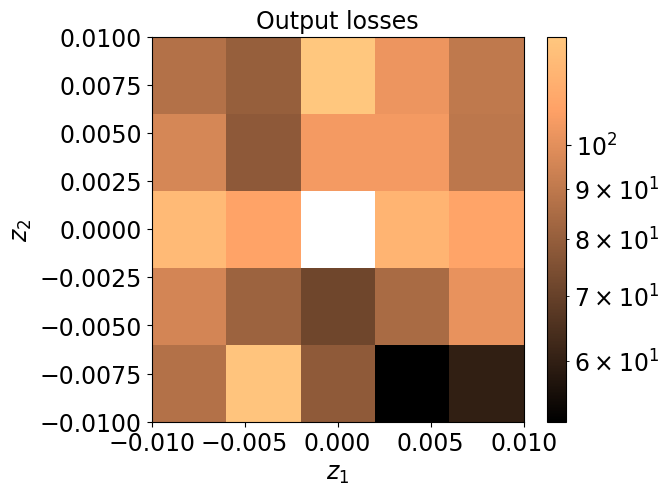

In [4]:
# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=False
)
# ------------------------------------

In [5]:
results = jack.get_results()

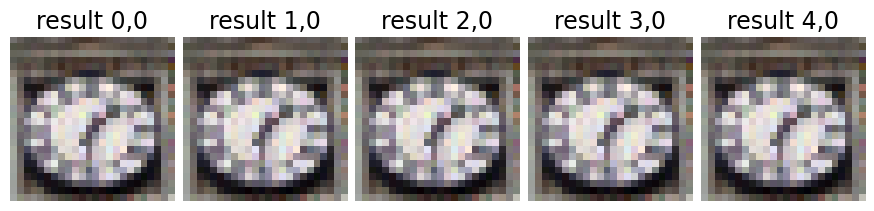

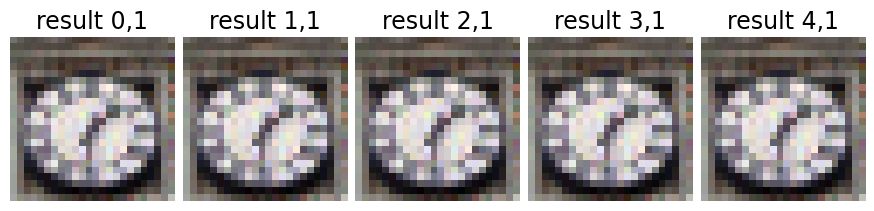

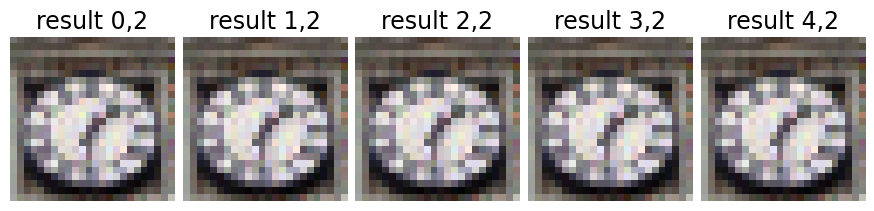

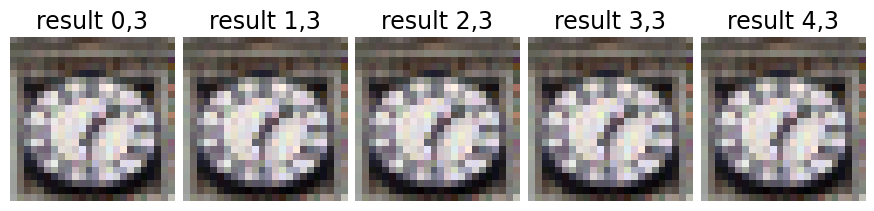

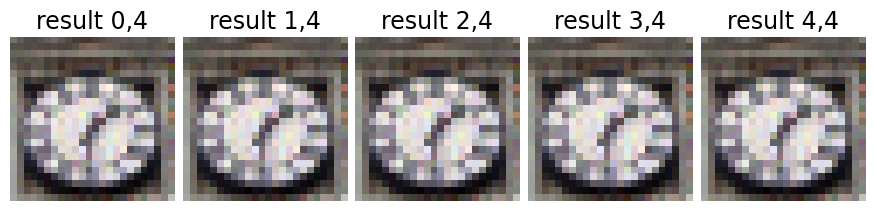

In [6]:
for j in range(results.shape[1]):
    outs = {f"result {i},{j}": results[i,j].to(device)
            for i in range(results.shape[0])}
    dinv.utils.plot(outs)